In [2]:
import abtem
import dask
import numpy as np
from bokeh.io import output_notebook
from ase.cluster import Decahedron
import time
output_notebook()

Loading BokehJS ...

In [3]:
abtem.config.set({"device": "cpu"})
abtem.config.set({"fft": "mkl"})
abtem.config.set({"mkl.threads": 1})

In [4]:
atoms = Decahedron("Au", 6, 2, 0)
atoms.rotate("x", -30)
atoms.center(vacuum=2)

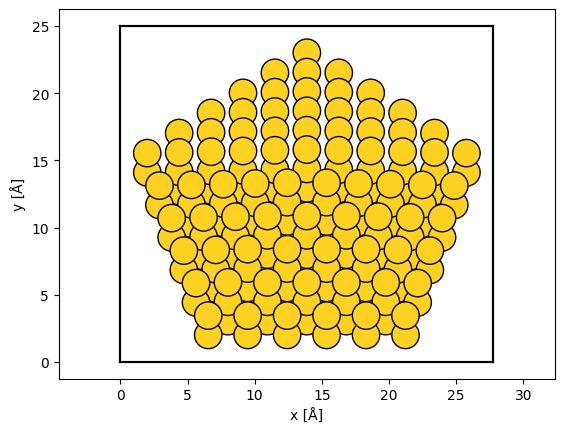

In [5]:
abtem.show_atoms(atoms);

In [6]:
frozen_phonons = abtem.FrozenPhonons(atoms, 1, {"C": 0.0, "Au": 0.}, ensemble_mean=True)

potential = abtem.Potential(
    frozen_phonons,
    gpts=(512,512),
    projection="infinite",
    slice_thickness=2,
)

probe = abtem.Probe(
    energy=200e3, 
    semiangle_cutoff=20,
)

scan = abtem.GridScan()

detector = abtem.AnnularDetector(inner=50, outer=150)

measurement = s_matrix.scan(potential, scan=scan, detectors=detector)

In [7]:
import time
import mkl_fft

In [8]:
%load_ext memray

In [10]:
abtem.Potential(
    atoms,
    gpts=(2048,2048),
    projection="infinite",
    slice_thickness=2,
).build(lazy=False)


In [15]:
abtem.Probe(
    energy=200e3, 
    semiangle_cutoff=20,
    extent=10,
    gpts=(8128,8128),
).build(lazy=True).array

dask.array<getitem, shape=(8128, 8128), dtype=complex64, chunksize=(8128, 8128), chunktype=numpy.ndarray>

In [16]:
%%memray_flamegraph

probe = abtem.Probe(
    energy=200e3, 
    semiangle_cutoff=20,
    extent=10,
    gpts=(8128,8128),
).build(lazy=False)

Output()

Output()

Results saved to memray-results/tmpqyxvi512/flamegraph.html

In [9]:
%%memray_flamegraph

potential = abtem.Potential(
    atoms,
    gpts=(2048,2048),
    projection="infinite",
    slice_thickness=1,
).build(lazy=False)

Output()

Output()

Results saved to memray-results/tmpighymszc/flamegraph.html

In [10]:
%%time

#from dask.distributed import performance_report

#with performance_report(filename="dask-report.html"):
measurement, profilers = measurement.compute(resource_profiler=True, profiler=True)

[########################################] | 100% Completed | 205.12 s
CPU times: user 14min 11s, sys: 2min 59s, total: 17min 10s
Wall time: 3min 26s


(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='x [Å]', ylabel='y [Å]'>)

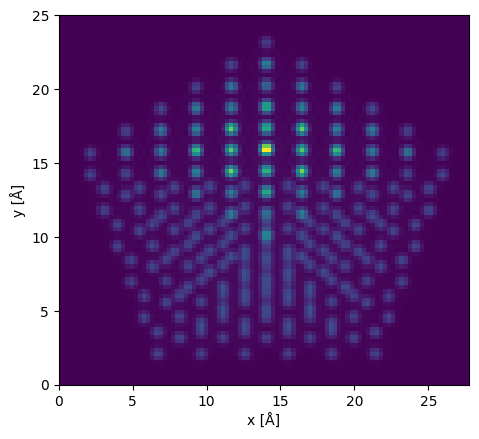

In [11]:
measurement.show()

In [12]:
profilers[0].visualize()

Figure(id='1003', ...)

In [13]:
profilers[1].visualize()

Figure(id='1105', ...)